# Pandas

This notebook covers a _lot_, go through it carefully and _read_ the code. Then work on _understanding_ it. Then apply it to your data set. Then once you've done that, you'll probably _actually_ understand it.

Messing about with the [NSW Penalty data](http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv)

`imports`, you've seen this before!

In [118]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime


Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [119]:
%matplotlib inline

Set the size of the plots that will come out when we ask for them. Annoyingly, these are in inches. Whatever an "inch" is

In [120]:
plt.rcParams["figure.figsize"] = (10, 5)


In [121]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to


Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [164]:
filepath = "nuforc_events.csv"

ufo_df = pd.read_csv("nuforc_events.csv")
print("done")


done


In [165]:
import pandas as pd

print(data.head())

             Event_Time  Event_Date    Year  Month   Day  Hour  Minute  \
0  2017-04-20T14:15:00Z  2017-04-20  2017.0    4.0  20.0  14.0    15.0   
1  2017-04-20T04:56:00Z  2017-04-20  2017.0    4.0  20.0   4.0    56.0   
2  2017-04-19T23:55:00Z  2017-04-19  2017.0    4.0  19.0  23.0    55.0   
3  2017-04-19T23:50:00Z  2017-04-19  2017.0    4.0  19.0  23.0    50.0   
4  2017-04-19T23:29:00Z  2017-04-19  2017.0    4.0  19.0  23.0    29.0   

         City State     Shape     Duration  \
0     Palmyra    NJ     Other    5 minutes   
1  Bridgeview    IL     Light   20 seconds   
2      Newton    AL  Triangle    5 seconds   
3      Newton    AL  Triangle    6 minutes   
4      Denver    CO     Light   60 minutes   

                                             Summary  \
0    I observed an aircraft that seemed to look odd.   
1  Bridgeview, IL, blue light.  ((anonymous report))   
2                               Silent triangle UFO.   
3  My friend and I stepped outside hoping to catc...  

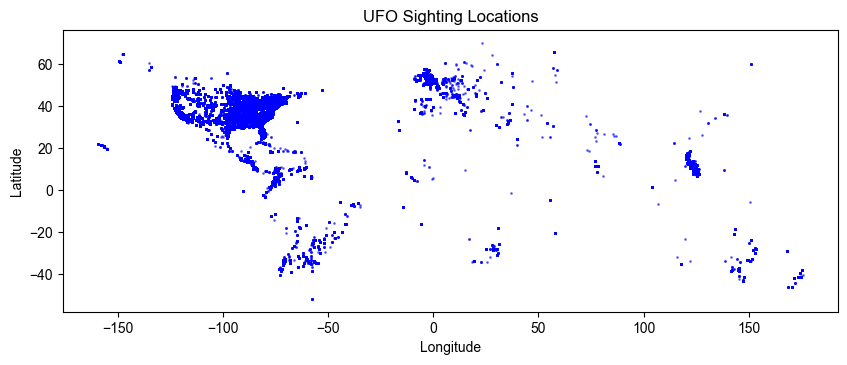

In [171]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt  

file_path = 'nuforc_events.csv'
data = pd.read_csv(file_path)

gdf.plot(markersize=1, color='blue', alpha=0.5)
plt.title('UFO Sighting Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


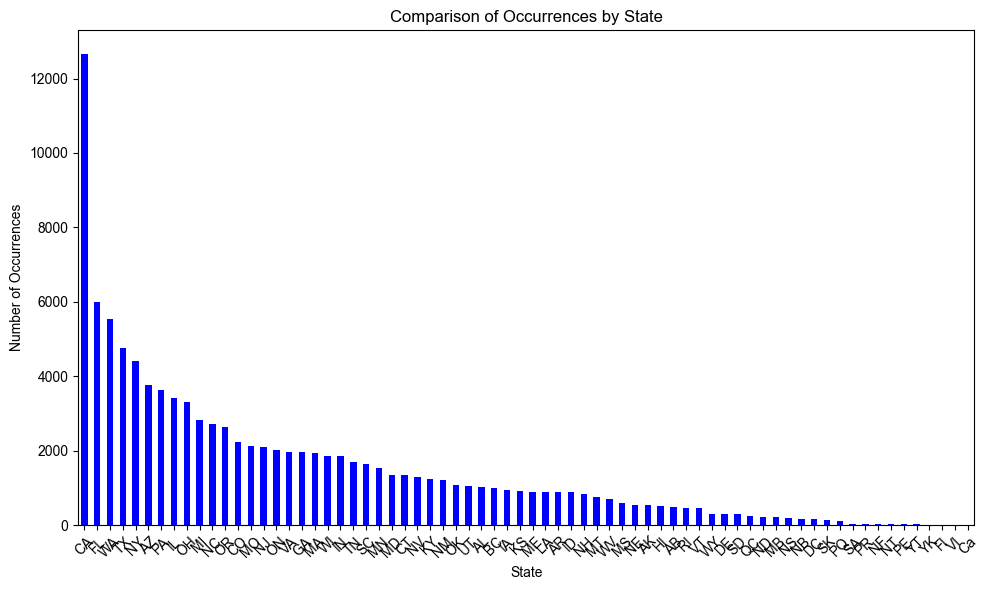

In [178]:
import pandas as pd
import matplotlib.pyplot as plt

file_path1 = 'nuforc_events.csv'
data1 = pd.read_csv(file_path1)

file_path2 = 'drug_induced_deaths_1999-2015.csv'
data2 = pd.read_csv(file_path2)

state_counts_data1 = data1['State'].value_counts()
state_counts_data2 = data2['State'].value_counts()

combined_state_counts = state_counts_data1.add(state_counts_data2, fill_value=0)

sorted_state_counts = combined_state_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sorted_state_counts.plot(kind='bar', color='blue')
plt.xlabel('State')
plt.ylabel('Number of Occurrences')
plt.title('Comparison of Occurrences by State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

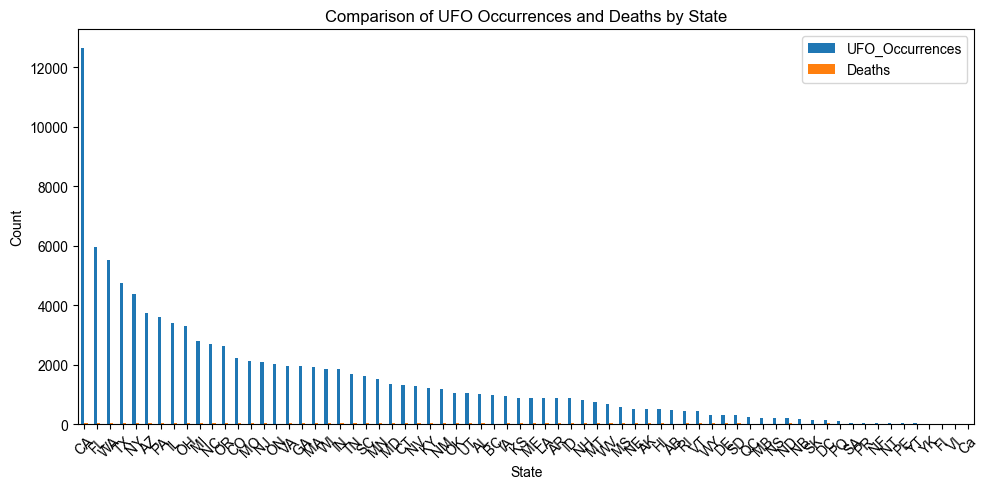

In [179]:
import pandas as pd
import matplotlib.pyplot as plt

file_path1 = 'nuforc_events.csv'
data1 = pd.read_csv(file_path1)

file_path2 = 'drug_induced_deaths_1999-2015.csv'
data2 = pd.read_csv(file_path2)

ufo_state_counts = data1['State'].value_counts()
deaths_state_counts = data2['State'].value_counts()

combined_state_counts = pd.DataFrame({
    'UFO_Occurrences': ufo_state_counts,
    'Deaths': deaths_state_counts
}).fillna(0)
sorted_combined_state_counts = combined_state_counts.sort_values(by='UFO_Occurrences', ascending=False)

plt.figure(figsize=(10, 6))
sorted_combined_state_counts.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Comparison of UFO Occurrences and Deaths by State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [184]:
print(ufo_data.columns)


Index(['Event_Time', 'Event_Date', 'Year', 'Month', 'Day', 'Hour', 'Minute',
       'City', 'State', 'Shape', 'Duration', 'Summary', 'Event_URL'],
      dtype='object')


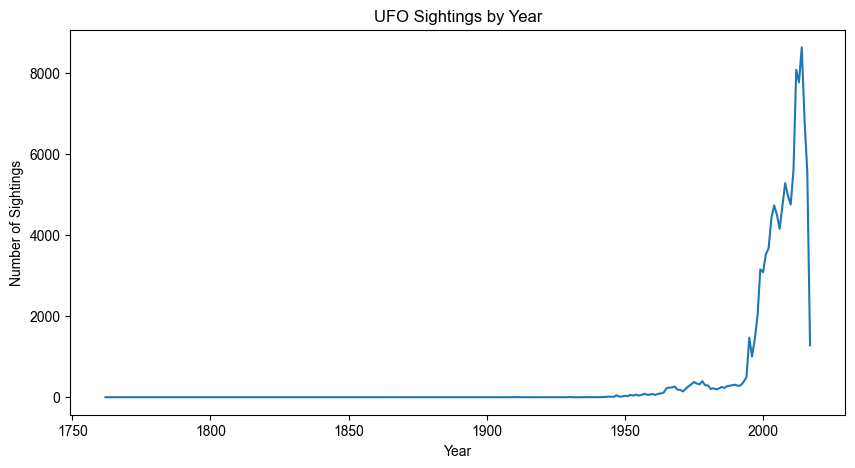

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

data_cleaned = pd.read_csv('nuforc_events.csv')

data_cleaned['Event_Date'] = pd.to_datetime(data_cleaned['Event_Date'], errors='coerce')

data_cleaned = data_cleaned.dropna(subset=['Event_Date'])

data_cleaned['Year'] = data_cleaned['Event_Date'].dt.year
data_cleaned['Month'] = data_cleaned['Event_Date'].dt.month
data_cleaned['Day'] = data_cleaned['Event_Date'].dt.day

yearly_counts = data_cleaned['Year'].value_counts().sort_index()

plt.plot(yearly_counts.index, yearly_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.title('UFO Sightings by Year')
plt.show()


In [129]:
ufo_df.head()


,Event_Time,Event_Date,Year,Month,Day,Hour,Minute,City,State,Shape,Duration,Summary,Event_URL
0,2017-04-20T14:15:00Z,2017-04-20,2017.0,4.0,20.0,14.0,15.0,Palmyra,NJ,Other,5 minutes,I observed an aircraft that seemed to look odd.,http://www.nuforc.org/webreports/133/S133726.html
1,2017-04-20T04:56:00Z,2017-04-20,2017.0,4.0,20.0,4.0,56.0,Bridgeview,IL,Light,20 seconds,"Bridgeview, IL, blue light. ((anonymous report))",http://www.nuforc.org/webreports/133/S133720.html
2,2017-04-19T23:55:00Z,2017-04-19,2017.0,4.0,19.0,23.0,55.0,Newton,AL,Triangle,5 seconds,Silent triangle UFO.,http://www.nuforc.org/webreports/133/S133724.html
3,2017-04-19T23:50:00Z,2017-04-19,2017.0,4.0,19.0,23.0,50.0,Newton,AL,Triangle,6 minutes,My friend and I stepped outside hoping to catc...,http://www.nuforc.org/webreports/133/S133723.html
4,2017-04-19T23:29:00Z,2017-04-19,2017.0,4.0,19.0,23.0,29.0,Denver,CO,Light,60 minutes,Moved slow but made quick turns staying and ci...,http://www.nuforc.org/webreports/133/S133721.html


`dataframe.head()` gives the top 5 rows, if it was `dataframe.head(3)` it would give the top 3 rows. 

`dataframe.sample(5)` gives you 5 random rows from your dataframe. It's a good way to avoid the trap where you confuse yourself the first few rows are odd.

In [185]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

file_path = 'nuforc_events.csv'
data = pd.read_csv(file_path)

data.drop(columns=['Event_URL'], inplace=True)


In [152]:
import pandas as pd

state_sightings = data['State'].value_counts()

print(state_sightings.head(10))

State
CA    12643
FL     5964
WA     5517
TX     4727
NY     4384
AZ     3744
PA     3600
IL     3402
OH     3289
MI     2793
Name: count, dtype: int64


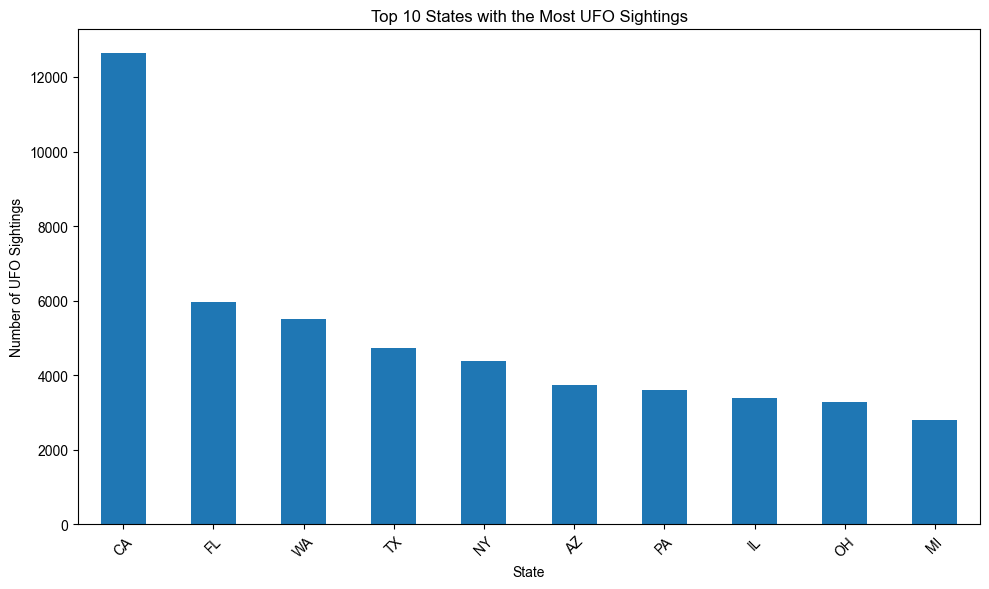

In [153]:
import pandas as pd
import matplotlib.pyplot as plt

state_sightings = data['State'].value_counts()

top_states = state_sightings.head(10)

plt.figure(figsize=(10, 6))
top_states.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Number of UFO Sightings')
plt.title('Top 10 States with the Most UFO Sightings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [150]:
import pandas as pd

city_sightings = data['City'].value_counts()

print(city_sightings.head(100))

City
Seattle             637
Phoenix             624
Las Vegas           508
Portland            508
San Diego           427
                   ... 
Manchester          108
Washington, D.C.    106
Milwaukee           106
El Paso             105
Lafayette           104
Name: count, Length: 100, dtype: int64


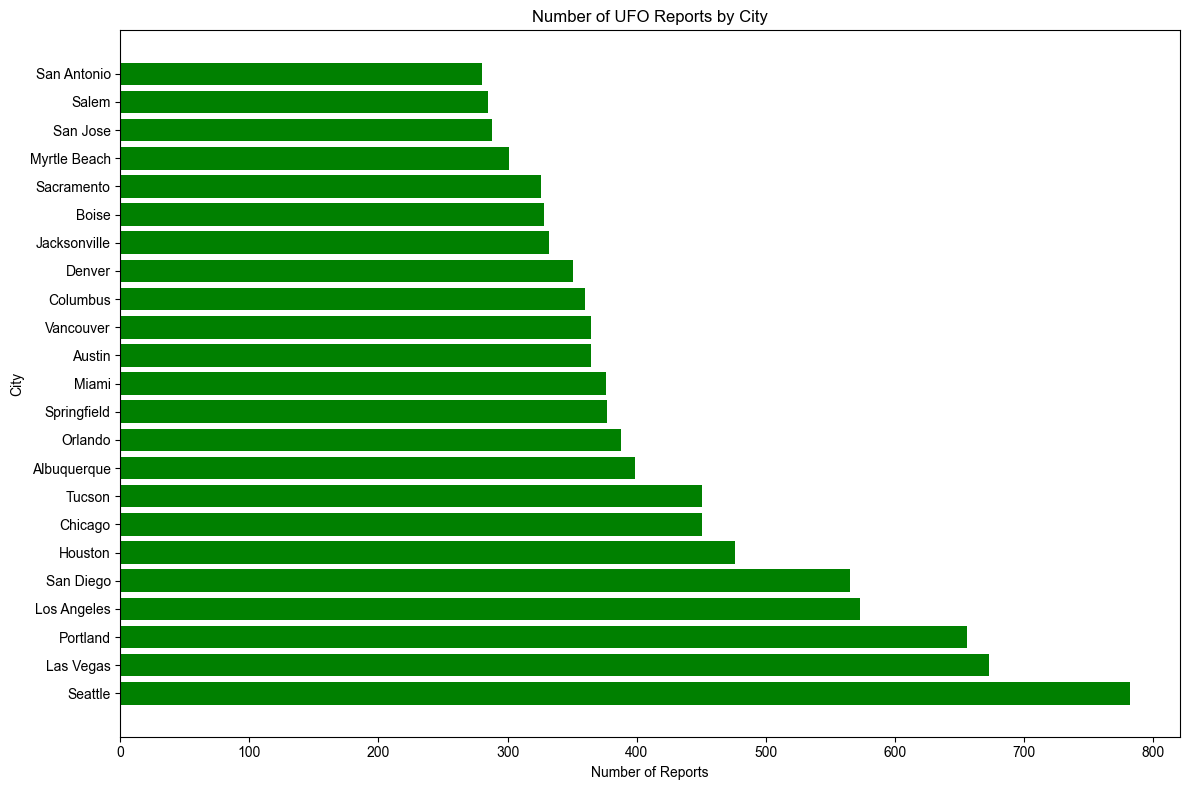

In [132]:
import matplotlib.pyplot as plt

cities = ["Seattle", "Las Vegas", "Portland", "Los Angeles", "San Diego", "Houston", "Chicago", "Tucson",
        "Albuquerque", "Orlando", "Springfield", "Miami", "Austin", "Vancouver", "Columbus", "Denver",
        "Jacksonville", "Boise", "Sacramento", "Myrtle Beach", "San Jose", "Salem", "San Antonio"]
num_reports = [782, 673, 656, 573, 565, 476, 451, 451, 399, 388, 377, 376, 365, 365, 360, 351, 332, 328, 326,
            301, 288, 285, 280]

plt.figure(figsize=(12, 8))
plt.barh(cities, num_reports, color='green')
plt.xlabel("Number of Reports")
plt.ylabel("City")
plt.title("Number of UFO Reports by City")
plt.tight_layout()

plt.show()


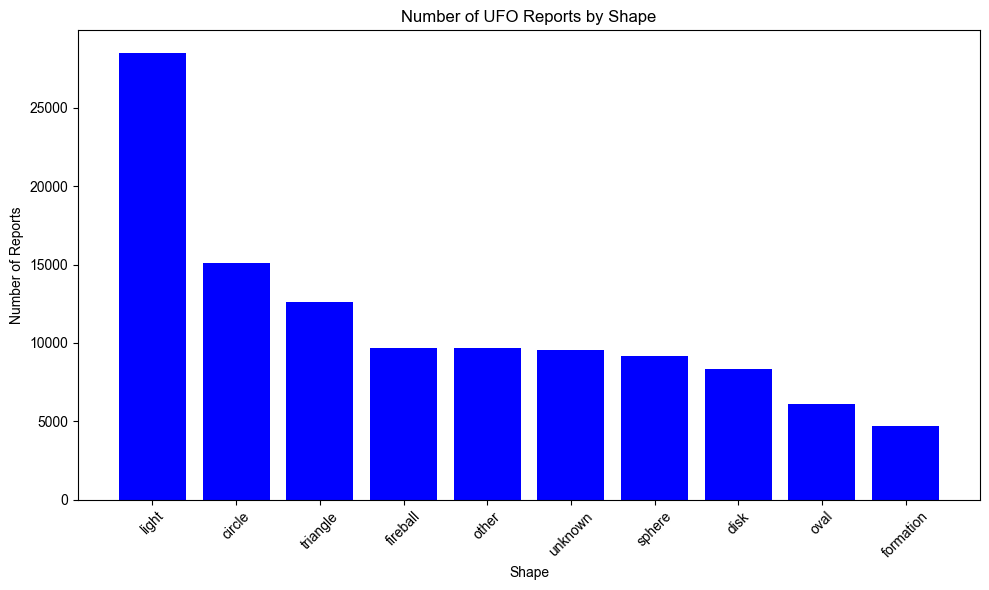

In [166]:
data = pd.read_csv('nuforc_events.csv')

import matplotlib.pyplot as plt

shapes = ["light", "circle", "triangle", "fireball", "other", "unknown", "sphere", "disk", "oval", "formation"]
num_reports = [28505, 15083, 12607, 9678, 9678, 9566, 9174, 8337, 6116, 4672]

plt.figure(figsize=(10, 6))
plt.bar(shapes, num_reports, color='blue')
plt.xlabel("Shape")
plt.ylabel("Number of Reports")
plt.title("Number of UFO Reports by Shape")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [133]:
print(data.head())

             Event_Time  Event_Date    Year  Month   Day  Hour  Minute  \
0  2017-04-20T14:15:00Z  2017-04-20  2017.0    4.0  20.0  14.0    15.0   
1  2017-04-20T04:56:00Z  2017-04-20  2017.0    4.0  20.0   4.0    56.0   
2  2017-04-19T23:55:00Z  2017-04-19  2017.0    4.0  19.0  23.0    55.0   
3  2017-04-19T23:50:00Z  2017-04-19  2017.0    4.0  19.0  23.0    50.0   
4  2017-04-19T23:29:00Z  2017-04-19  2017.0    4.0  19.0  23.0    29.0   

         City State     Shape     Duration  \
0     Palmyra    NJ     Other    5 minutes   
1  Bridgeview    IL     Light   20 seconds   
2      Newton    AL  Triangle    5 seconds   
3      Newton    AL  Triangle    6 minutes   
4      Denver    CO     Light   60 minutes   

                                             Summary  
0    I observed an aircraft that seemed to look odd.  
1  Bridgeview, IL, blue light.  ((anonymous report))  
2                               Silent triangle UFO.  
3  My friend and I stepped outside hoping to catc...  
4  

In [134]:
import pandas as pd

file_path = 'nuforc_events.csv'
data = pd.read_csv(file_path)

data.drop(columns=['Event_URL'], inplace=True)


In [135]:
import pandas as pd
import re

file_path = 'nuforc_events.csv'
data = pd.read_csv(file_path)

data.drop(columns=['Event_URL'], inplace=True)

def extract_minutes(duration):
    if pd.isna(duration):
        return None
    
    duration = duration.lower() 
    
    if "minute" in duration:
        if re.match(r'\d+', duration):  
            return int(re.search(r'\d+', duration).group()) 
    elif "hour" in duration:
        if re.match(r'\d+', duration): 
            hours = int(re.search(r'\d+', duration).group())
            return hours * 60  
    elif "second" in duration:
        if re.match(r'\d+', duration):  
            return round(int(re.search(r'\d+', duration).group()) / 60, 2) 
    
    return None

data['Duration_Minutes'] = data['Duration'].apply(extract_minutes)

print(data.head())


             Event_Time  Event_Date    Year  Month   Day  Hour  Minute  \
0  2017-04-20T14:15:00Z  2017-04-20  2017.0    4.0  20.0  14.0    15.0   
1  2017-04-20T04:56:00Z  2017-04-20  2017.0    4.0  20.0   4.0    56.0   
2  2017-04-19T23:55:00Z  2017-04-19  2017.0    4.0  19.0  23.0    55.0   
3  2017-04-19T23:50:00Z  2017-04-19  2017.0    4.0  19.0  23.0    50.0   
4  2017-04-19T23:29:00Z  2017-04-19  2017.0    4.0  19.0  23.0    29.0   

         City State     Shape     Duration  \
0     Palmyra    NJ     Other    5 minutes   
1  Bridgeview    IL     Light   20 seconds   
2      Newton    AL  Triangle    5 seconds   
3      Newton    AL  Triangle    6 minutes   
4      Denver    CO     Light   60 minutes   

                                             Summary  Duration_Minutes  
0    I observed an aircraft that seemed to look odd.              5.00  
1  Bridgeview, IL, blue light.  ((anonymous report))              0.33  
2                               Silent triangle UFO.       

In [169]:
from collections import Counter

all_summaries = ' '.join(data['Summary'].dropna())
words = all_summaries.split()
word_counts = Counter(words)
least_used_word = min(word_counts, key=word_counts.get)

print(f"The least used word is '{least_used_word}' with {word_counts[least_used_word]} occurrences.")


The least used word is 'Bridgeview,' with 1 occurrences.


In [139]:
ufo_df.sample(5)


,Event_Time,Event_Date,Year,Month,Day,Hour,Minute,City,State,Shape,Duration,Summary,Event_URL
98447,1996-08-18T03:18:00Z,1996-08-18,1996.0,8.0,18.0,3.0,18.0,Coon Rapids,MN,Other,1 minute,A V shaped craft with amber colored lights tha...,http://www.nuforc.org/webreports/014/S14970.html
68260,2005-11-05T18:30:00Z,2005-11-05,2005.0,11.0,5.0,18.0,30.0,Bellingham,WA,Disk,20 min,I saw a military disc shaped craft hovering lo...,http://www.nuforc.org/webreports/055/S55789.html
34670,2012-07-04T21:40:00Z,2012-07-04,2012.0,7.0,4.0,21.0,40.0,Winter Haven,FL,Circle,5 minutes,There were three orange orb like circles that ...,http://www.nuforc.org/webreports/090/S90635.html
69834,2005-07-23T01:56:00Z,2005-07-23,2005.0,7.0,23.0,1.0,56.0,Bay City,MI,Disk,3 hours,"Disk, at night, left stream of lights, time la...",http://www.nuforc.org/webreports/104/S104132.html
13445,2015-01-12T19:40:00Z,2015-01-12,2015.0,1.0,12.0,19.0,40.0,Rancho Cucamonga,CA,Fireball,8 minutes,"A large object, engulfed in flames, chillingly...",http://www.nuforc.org/webreports/116/S116681.html


We can also get the list of columns out of the data frame

             Event_Time  Event_Date    Year  Month   Day  Hour  Minute  \
0  2017-04-20T14:15:00Z  2017-04-20  2017.0    4.0  20.0  14.0    15.0   
1  2017-04-20T04:56:00Z  2017-04-20  2017.0    4.0  20.0   4.0    56.0   
2  2017-04-19T23:55:00Z  2017-04-19  2017.0    4.0  19.0  23.0    55.0   
3  2017-04-19T23:50:00Z  2017-04-19  2017.0    4.0  19.0  23.0    50.0   
4  2017-04-19T23:29:00Z  2017-04-19  2017.0    4.0  19.0  23.0    29.0   

         City State     Shape     Duration  \
0     Palmyra    NJ     Other    5 minutes   
1  Bridgeview    IL     Light   20 seconds   
2      Newton    AL  Triangle    5 seconds   
3      Newton    AL  Triangle    6 minutes   
4      Denver    CO     Light   60 minutes   

                                             Summary  \
0    I observed an aircraft that seemed to look odd.   
1  Bridgeview, IL, blue light.  ((anonymous report))   
2                               Silent triangle UFO.   
3  My friend and I stepped outside hoping to catc...  

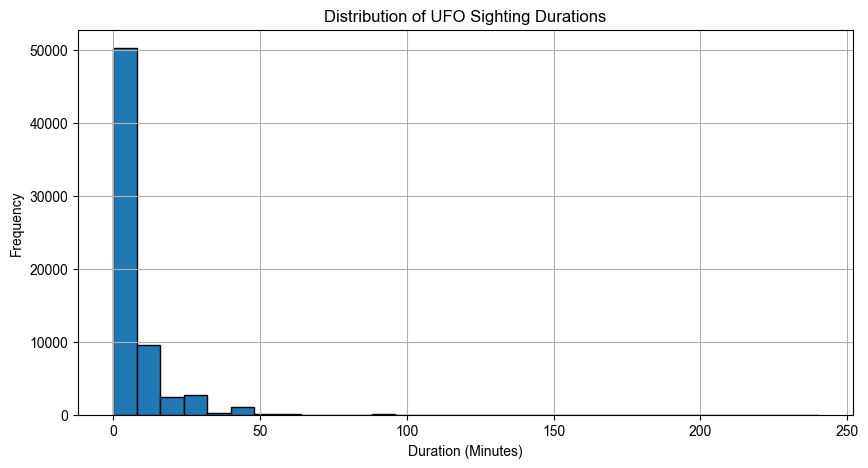

In [187]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'nuforc_events.csv'
data = pd.read_csv(file_path)

def extract_minutes(duration):
    if pd.notnull(duration):
        match = re.search(r'\d+', duration)
        if match:
            if "second" in duration:
                return round(int(match.group()) / 60, 2)  
            elif "minute" in duration:
                return int(match.group()) 
    return None


data['Duration_Minutes'] = data['Duration'].apply(extract_minutes)

print(data.head())


data['Duration_Minutes'].hist(bins=30, edgecolor='k')
plt.xlabel("Duration (Minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of UFO Sighting Durations")
plt.show()


In [141]:
ufo_df.columns

Index(['Event_Time', 'Event_Date', 'Year', 'Month', 'Day', 'Hour', 'Minute',
       'City', 'State', 'Shape', 'Duration', 'Summary', 'Event_URL'],
      dtype='object')

This is useful for you when you are documenting your dataset, you can make each column a heading, and then describe that column's characteristics.

You can't index a row directly, you need to use the `iloc` property. That means the _interger location_, so the zeroeth row would be `df.iloc[0]`. 

This gives us the row as a _Series_.

↓

In [142]:
row_one = ufo_df.iloc[1]
row_one


Event_Time                                 2017-04-20T04:56:00Z
Event_Date                                           2017-04-20
Year                                                     2017.0
Month                                                       4.0
Day                                                        20.0
Hour                                                        4.0
Minute                                                     56.0
City                                                 Bridgeview
State                                                        IL
Shape                                                     Light
Duration                                             20 seconds
Summary       Bridgeview, IL, blue light.  ((anonymous report))
Event_URL     http://www.nuforc.org/webreports/133/S133720.html
Name: 1, dtype: object

Series objects are _very_ similar to dictionaries. They have more properties though.

In [143]:
row_one[0]

'2017-04-20T04:56:00Z'

You can access them like a dictionary ☝ or you can access them like a property 👇. 

I like the `my_series.key_name` best, but it won't work if there are spaces in your column title. That can happen if you are getting the data from somewhere else (i.e. you didn't make it).

In [144]:
row_one.Event_Time

'2017-04-20T04:56:00Z'

Doing the same thing on a dataframe gives us the whole column

In [145]:
ufo_df.Event_Time

0         2017-04-20T14:15:00Z
1         2017-04-20T04:56:00Z
2         2017-04-19T23:55:00Z
3         2017-04-19T23:50:00Z
4         2017-04-19T23:29:00Z
                  ...         
110260                     NaN
110261                     NaN
110262                     NaN
110263                     NaN
110264                     NaN
Name: Event_Time, Length: 110265, dtype: object

<Axes: >

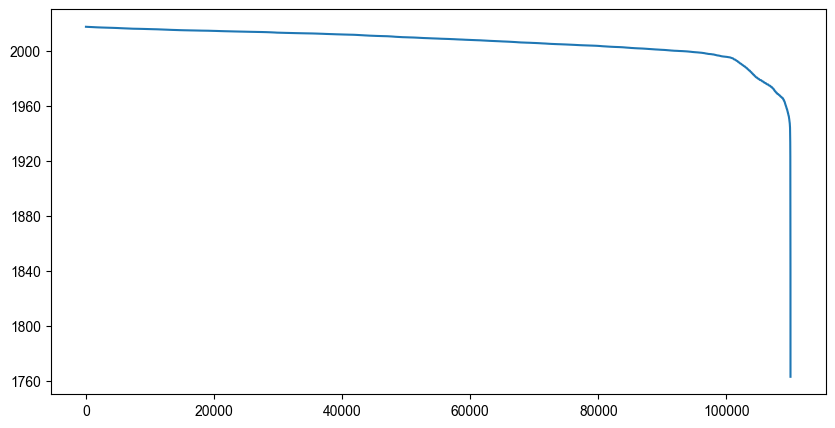

In [188]:
ufo_df['Event_Date'] = pd.to_datetime(ufo_df['Event_Date'], errors='coerce')
ufo_df.dropna(subset=['Event_Date'], inplace=True)
ufo_df['Event_Date'] = pd.to_datetime(ufo_df['Event_Date'])
ufo_df["Event_Date"].plot()


If we do a simple `plot` on this column we get a pretty dense, but useless graph. It much better one would be a histogram.

             Event_Time  Event_Date    Year  Month   Day  Hour  Minute  \
0  2017-04-20T14:15:00Z  2017-04-20  2017.0    4.0  20.0  14.0    15.0   
1  2017-04-20T04:56:00Z  2017-04-20  2017.0    4.0  20.0   4.0    56.0   
2  2017-04-19T23:55:00Z  2017-04-19  2017.0    4.0  19.0  23.0    55.0   
3  2017-04-19T23:50:00Z  2017-04-19  2017.0    4.0  19.0  23.0    50.0   
4  2017-04-19T23:29:00Z  2017-04-19  2017.0    4.0  19.0  23.0    29.0   

         City State     Shape     Duration  \
0     Palmyra    NJ     Other    5 minutes   
1  Bridgeview    IL     Light   20 seconds   
2      Newton    AL  Triangle    5 seconds   
3      Newton    AL  Triangle    6 minutes   
4      Denver    CO     Light   60 minutes   

                                             Summary  Duration_Minutes  
0    I observed an aircraft that seemed to look odd.              5.00  
1  Bridgeview, IL, blue light.  ((anonymous report))              0.33  
2                               Silent triangle UFO.       

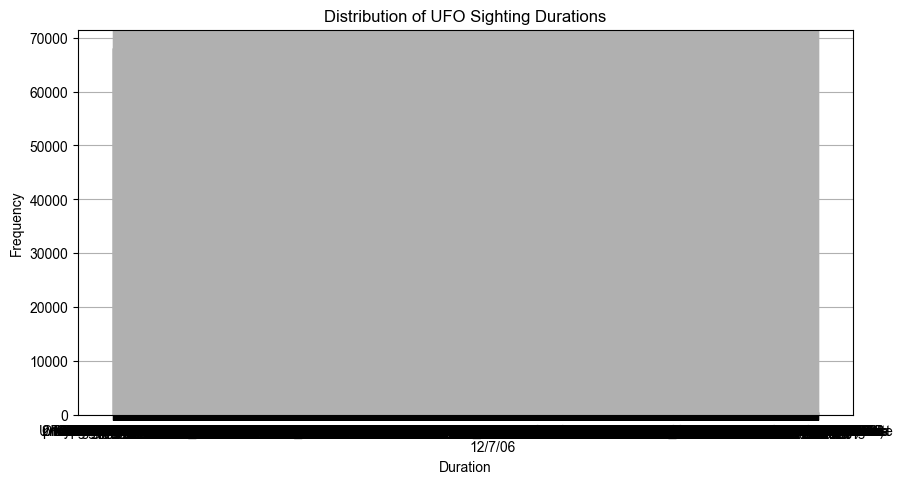

In [147]:
import pandas as pd
import re

file_path = 'nuforc_events.csv'
data = pd.read_csv(file_path)

data.drop(columns=['Event_URL'], inplace=True)

def extract_minutes(duration):
    if pd.isna(duration):
        return None
    
    duration = duration.lower()  
    
    if "minute" in duration:
        if re.match(r'\d+', duration):  
            return int(re.search(r'\d+', duration).group())  
    elif "hour" in duration:
        if re.match(r'\d+', duration): 
            hours = int(re.search(r'\d+', duration).group())
            return hours * 60  
    elif "second" in duration:
        if re.match(r'\d+', duration):  
            return round(int(re.search(r'\d+', duration).group()) / 60, 2)  
    
    return None

data['Duration_Minutes'] = data['Duration'].apply(extract_minutes)

print(data.head())
data["Duration"].hist(bins=30, edgecolor='k')
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.title("Distribution of UFO Sighting Durations")
plt.show()

import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "Arial"